# **Aymeric BEILLON et Antoine BERTIN**

# **Introduction**
----------------

### Le but de ce projet est de créer un modèle de classification supervisée, permettant, à partir d'un jeu de données d'une compagnie d'assurance de classer des données. 
Ces données prennent la forme de profils clients, ces profils comprennent de nombreuses informations comme par exemple l'âge, le genre ou le credit score de l'assuré. La donnée importante pour la création de notre modèle et la connaissance de si, oui ou non, l'assuré à fait une demande d'indemnisation, cela pourra permettre à cette compagnie d'assurance de prévoir à l'avance selon le profil de nouveau clients, si ils feront une nouvelle demande. 



## PARTIE 1 | IMPORTATION ET LECTURE DES DONNÉES
------
Ce premier bout de code permet de récupérer et lire les données depuis notre fichier CSV afin d'avoir une première analyse superficielle, ce faisant, nous pouvons vérifier la forme que prennent ces dites données. Ainsi nous pouvons préciser l'objectif du problème, il faut analyser les données pour prédire la demande d'indemnisation 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()



first_rows, info, description

# PARTIE 2 | EXAMEN DES DONNÉES
-------
Dans cette partie l'objectif est de déceler, en analysant via des fonctions python, les valeurs manquantes et ou aberrantes présentes dans notre jeu de données. Ici, pour vérifier la présence potentielle de valeurs 'NA', nous allons utiliser la fonction isna() de Pandas, cette fonction permet de retourner ceci sur un DataFrame. Associée à la fonction sum(), nous pouvons retourner le nombre total de valeurs nulles sur chaque colonne. Il est également important de pouvoir vérifier les valeurs aberrantes, pour ce faire nous utilisons la méthode max() de python, permettant de retourner la valeur maximum de chaque colonne. Cette étape de vérification des données est essentielle puisqu'elle permet de savoir les actions à réaliser durant la phase de préparation des données. Pour vérifier les valeurs aberrantes, nous pouvons utiliser un box plot, qui représente les données de manière plus claire pour voir la présence de ces valeurs.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()
maxi = data.max()


# Détection des valeurs manquantes
missing_values = data.isna().sum()
data = data.drop(columns=['id'])

data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(50, 10))
plt.show()

first_rows, info, description, missing_values


## Affichage du nombre de données manquantes pour chaque colonne
print(missing_values)
print(maxi)


Ici nous pouvons ainsi repérer deux colonnes (credit_score et annual_mileage) qui comporte respectivement 982 et 957 valeurs manquantes. 
Afin de pouvoir travailler avec ces colonnes, il existe plusieurs solutions. Celles-ci peuvent être: 
- Suppression de la colonne
- Imputation des valeurs manquantes à une valeur médiane
- Mise à la valeur la plus courante

Dans notre cas, le plus intéressant sera l'imputation à une valeur médiane afin de conserver le plus de cohérence sur les données

Nous observons également des valeurs dites "aberrantes", qui sont trop élevées sans faire de sens, pour celle-ci, nous appliquerons une méthode permettant de limiter les valeurs entre des bornes. Ce box plot permet de voir clairement les valeurs aberrantes, pusique nous pouvons voir une valeur d'enfant au delà de 100, ceci ne faisant pas de sens, il sera nécessaire de la modifier dans la préparation de données

# PARTIE 3 | PREPARATION DES DONNEES
-----
 
Comme mentionné précédemment, nos données contiennent des valeurs manquantes ('NA') et des valeurs aberrantes. Dans cette phase de préparation des données, nous allons imputer ces valeurs et lisser le jeu de données afin d'obtenir un dataset cohérent, sur lequel nous pourrons travailler.

Pour ce faire en Python, nous utiliserons des méthodes provenant du package scikit-learn, qui contient de nombreuses fonctions utiles pour manipuler les jeux de données. Pour imputer les valeurs à la médiane, nous utiliserons la classe SimpleImputer, qui permet de choisir la méthode d'imputation à utiliser. Ici, nous opterons pour l'imputation à la valeur médiane.

Les lignes de code suivantes montrent comment transformer les valeurs manquantes en utilisant les règles définies par notre imputeur. 

Ensuite, pour limiter les valeurs aberrantes, nous utiliserons une fonction lambda (une méthode anonyme). Cette fonction lambda applique le nombre minimum entre la valeur présente dans la colonne et un seuil fixé (10 pour speeding_violations et 5 pour children).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

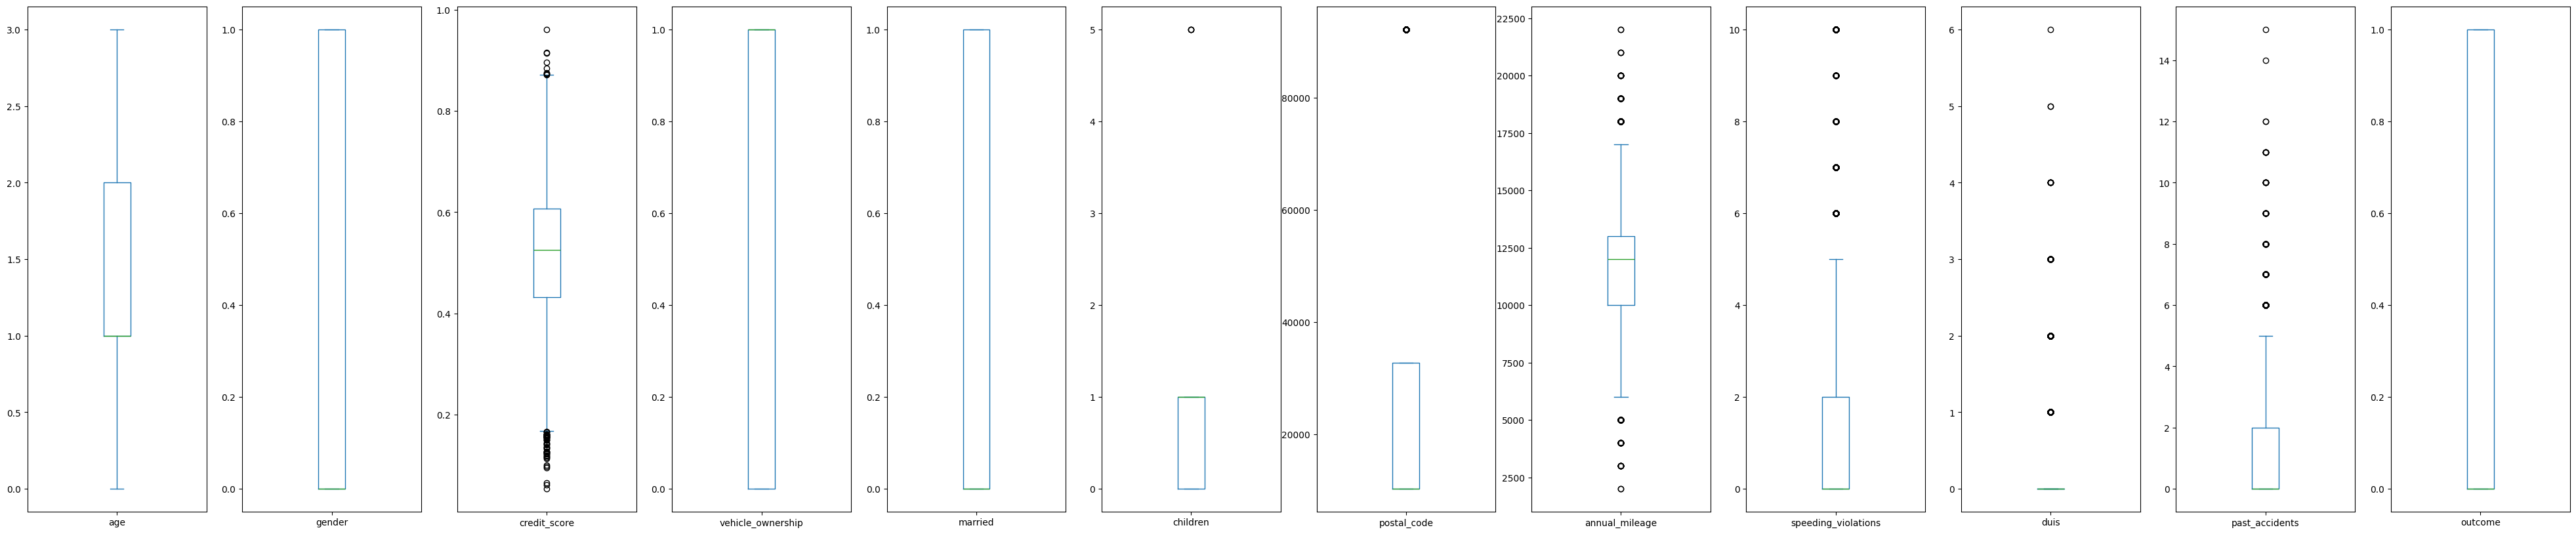

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()


#suppression de la valeur inutile
data = data.drop(columns=['id'])

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])


print(first_rows)

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 10))
data['children'] = data['children'].apply(lambda x: min(x, 5))

missing_values = data.isnull().sum()

data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(50, 10))


# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)
print(missing_values)
print(data)



Après avoir préparé les données nous pouvons de nouveau les analyser comme fait dans la partie précédente. 
Nous n'avons ainsi plus de valeurs nulles, ni de valeurs aberrantes, notre jeu de données est donc prêt pour les parties suivantes:  la recherche de corellations et l'entraînement de notre modèle.

# PARTIE 4 | RECHERCHE DE CORRÉLATION
----------
Un jeu de données est un ensemble complet de données utilisé pour entraîner un modèle. Pour évaluer la performance de ce modèle, on le teste souvent sur un jeu de données de validation, qui est un sous-ensemble distinct non utilisé lors de l'entraînement. La séparation entre le jeu de données d'entraînement et celui de validation se fait de manière totalement aléatoire, afin d'obtenir des résultats représentatifs.


En entraînant le modèle sur le premier jeu, on ajuste ses paramètres pour obtenir les meilleures prédictions possibles. Ensuite, on utilise le jeu de validation pour tester le modèle et s'assurer qu'il génère des résultats fiables sur des données non vues. Tester, c'est explorer les capacités du modèle pour découvrir ses points forts et faibles, tandis que valider consiste à prouver que les prédictions du modèle sont correctes et généralisables.


Une bonne analogie serait celle d'un élève en mathématiques qui s'entraîne avec des exercices préparatoires (les TD) avant de passer un examen (le DS). Après l'entraînement initial, il peut s'exercer davantage avec d'autres exercices similaires pour s'assurer qu'il maîtrise bien les concepts, de la même manière qu'on utilise des données de validation pour confirmer la robustesse d'un modèle entraîné.


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()


# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 20))
data['children'] = data['children'].apply(lambda x: min(x, 5))

# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)

# Transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['age', 'credit_score', 'annual_mileage']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

numeric_data = data[['age', 'credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome','vehicle_year']]

cor = numeric_data.corr()
scatter_matrix = pd.plotting.scatter_matrix(numeric_data, figsize=(15, 15))


plt.show()
sns.heatmap(cor, annot=True, cmap='coolwarm')

# PARTIE 5 | EXTRACTION DES JEUX D'APPRENTISSAGE ET DE TEST
----------
Pour tester et valider notre algorithme nous pouvons procéder de deux manières.

la première en entraînant notre algorithme avec une partie des données et ensuite valider l'entraînement des données avec l’autre partie.

On peut partir sur une base de 75% de données d'entraînement et ensuite 25% de données de validation. Cette répartition est assez arbitraire. En effet nous ne possédons pas un nombre données illimités et donc si on entraîne notre algorithme avec peu de données pour ne pas sur entraîner notre algorithme. Ce qui donnerait des résultats erronés. 

Pour faire ceci en Python, nous allons utiliser des méthodes provenant du package scikit-learn, voici leur fonctionnement: 
Tout d'abord, nous séparons les données en variables explicatives et variable cible (ici X représente les variables explicatives et Y la cible). Dans X, nous conservons toute la table en supprimant seulement l'ID, ici inutile, et l'outcome. X représente donc les variables explicatives (features) utilisées pour prédire l'issue tandis que Y est la variable cible, qui est la colonne outcome du DataFrame data. C'est ce que nous voulons prédire.



Nous utilisons par la suite *train_test_split(X,y, random_state=100)* Cette fonction de scikit-learn divise les données en ensembles d'entraînement et de test.
X et y sont les variables explicatives et la variable cible respectivement.
random_state=100 fixe la graine du générateur de nombres aléatoires pour que la division soit reproductible. Si on réexécute le code, nous obtenons les mêmes ensembles d'entraînement et de test. Cela nous sort donc :

- X_train : Contient les variables explicatives pour l'ensemble d'entraînement.
- X_test : Contient les variables explicatives pour l'ensemble de test.
- y_train : Contient les étiquettes de l'ensemble d'entraînement.
- y_test : Contient les étiquettes de l'ensemble de test.

*preprocessor.fit_transform(X_train)*:

*preprocessor* est un objet de type *ColumnTransformer* qui applique des transformations spécifiées sur les colonnes de *X_train*.
fit_transform ajuste les transformateurs spécifiés dans preprocessor aux données d'entraînement *X_train* et applique les transformations.
Cela signifie que les données d'entraînement sont transformées en fonction des spécifications données (par exemple, imputation, encodage).

*preprocessor.transform(X_test)* :

*preprocessor* utilise les mêmes paramètres (calculés lors de *fit_transform* sur *X_train*) pour transformer *X_test*.
Cela garantit que les transformations appliquées aux données de test sont cohérentes avec celles appliquées aux données d'entraînement.

In [ ]:
#import des packages
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


# Lecture du fichier CSV
data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()

# Détection des valeurs manquantes
missing_values = data.isna().sum()

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 10))

# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)


# Transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['age', 'credit_score', 'annual_mileage']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Séparation des données en variables explicatives et cible
X = data.drop(['id', 'outcome'], axis=1)
y = data['outcome']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape, X_test.shape)
missing_values = data.isna().sum()


# PARTIE 6 | ENTRAINEMENT D'UN MODELE 
------

Maintenant que nous avons nos set d'entraînement et de tests, nous allons pouvoir les utiliser pour entraîner et tester notre modèle de régression logistique. Pour ce faire nous utilisons la méthode *LogisticRegression* du package scikit-learn, celle-ci va entraîner notre modèle. 

La ligne de code ***model = LogisticRegression(max_iter=2000)*** crée un modèle de régression logistique avec une configuration spécifique dans le contexte de la bibliothèque scikit-learn. La variable max_iter va spécifier le nombre maximum d'itérations que l'algorithme d'optimisation est autorisé à effectuer lors de l'entraînement du modèle. Par défaut, ce paramètre est souvent fixé à une valeur relativement basse (par exemple, 100), mais dans ce cas, il est défini à 2000 pour permettre à l'algorithme plus de temps pour converger vers une solution optimale.

------

## Réponses aux Questions : 

### Régression Logistique

La régression logistique utilise le concept d'évidence pour transformer cette probabilité en une valeur plus facile à manipuler mathématiquement.

**Fonction Logit: La fonction logit transforme la probabilité p en une valeur réelle non bornée. La transformation est donnée par: logit(p) = ln(p/1p)**

### Hypothèse

Cette hypothèse permet de transformer la probabilité en une forme linéairement optimisable, facilitant ainsi l'ajustement et la prédiction du modèle. On passe d’une proba à un nombre linéaire entre - et + l’infini. 

**Relation Linéaire : La régression logistique suppose que le logit de la probabilité peut être exprimé comme une combinaison linéaire des variables explicatives** 

### Fonction de Coût


La fonction de coût utilisée pour la régression logistique est la log-vraisemblance négative. L'objectif est 
d'optimiser cette fonction pour ajuster les coefficients avec l’algorithme de Descente de Gradient
Calcul du Gradient : Le gradient de la fonction de coût par rapport à chaque coefficient (biais et Poids)

**Itération: Ces étapes sont répétées jusqu'à convergence (jusqu'à ce que les changements dans la fonction de coût deviennent très petits ou après un nombre fixé d'itérations. Avec les variables calculés en fonction des probas on en ressort des biais et des poids d’après des calculs qui sont faits pour minimiser la perte**




### Phase d'Apprentissage

Pendant la phase d'apprentissage de l'algorithme de régression logistique, les paramètres suivants sont calculés et ajustés :
**Coefficients (Poids) des Variables Explicatives : Pour chaque variable explicative un coefficient est calculé. Ces coefficients représentent l'impact de chaque variable explicative sur la probabilité prédite de l'événement.**


#### Terme d'Interception (Biais) :
Un coefficient d'interception est également calculé. Ce terme est indépendant des variables explicatives et capture l'impact moyen sur la probabilité prédite en l'absence de toute variable explicative.
Donc le calcul gradient initialise le poids, c'est-à dire toutes les variables et le bias (l'interception), un calcul sans toutes ses variables. Et dans la phase d’apprentissage Le biais est important pour la Flexibilité et améliorer la précision.


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()

# Détection des valeurs manquantes
missing_values = data.isna().sum()

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 10))

# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)


# Transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['age', 'credit_score', 'annual_mileage']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Séparation des données en variables explicatives et cible
X = data.drop(['id', 'outcome'], axis=1)
y = data['outcome']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape, X_test.shape)
missing_values = data.isna().sum()

# Visualisation des distributions des variables numériques


first_rows, info, description, missing_values


# Calcul des corrélations
correlation_matrix = numeric_data.corr()
model = LogisticRegression(max_iter=800)
model.fit(X_train, y_train)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

LogisticRegression(max_iter=800)

# PARTIE 7 | EVALUATION D'UN MODÈLE
-------
Pour évaluer la performance de notre modèle, nous utilisons plusieurs métriques. L'accuracy en est des plus simples à comprendre, elle mesure la proportion des prédictions correctes par rapport à l'ensemble des prédictions. Elle est calculée en divisant le nombre de prédictions correctes par rapport au nombre total de prédictions. Une accuracy élevée indique que le modèle est généralement correct, mais elle peut être trompeuse si les classes sont déséquilibrées.

La matrice de confusion offre une évaluation plus détaillée en montrant la répartition des prédictions correctes et incorrectes parmi les différentes classes. Elle se présente sous la forme d'une grille où chaque ligne représente les instances réelles d'une classe et chaque colonne représente les instances prédictes d'une classe. Cela permet de voir non seulement combien de prédictions ont été correctes, mais aussi de comprendre où les erreurs se produisent. Ainsi sur la première colonne nous voyons les Vrais positifs et les faux positifs, dans la deuxième les faux négatifs et les vrais négatifs.

Enfin, le classification report fournit une vue d'ensemble des principales métriques de classification pour chaque classe, telles que la précision (precision), le rappel (recall) et le score F1. La précision est le ratio des vraies prédictions positives sur le total des prédictions positives, le rappel est le ratio des vraies prédictions positives sur le total des instances positives, et le score F1 est la moyenne harmonique de la précision et du rappel. Ces métriques offrent une compréhension plus nuancée de la performance du modèle, en particulier dans les cas où les classes sont déséquilibrées.

En pratique, il s'agit de trouver un compromis entre l'accuracy et le rappel.

Ainsi, nous obtenons une accuracy d'environ 81%, avec un score de précision de 71% pour le positif et 85% pour le négatif, de même le score f1 est de 66% pour le positif et 87% pour le négatif

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()

# Détection des valeurs manquantes
missing_values = data.isna().sum()

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 10))

# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)


# Transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['age', 'credit_score', 'annual_mileage']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Séparation des données en variables explicatives et cible
X = data.drop(['id', 'outcome'], axis=1)
y = data['outcome']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape, X_test.shape)
missing_values = data.isna().sum()

# Visualisation des distributions des variables numériques

first_rows, info, description, missing_values

# Création d'un DataFrame avec les données transformées pour les variables numériques uniquement
numeric_data = data[['age', 'credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome','vehicle_year']]

# Calcul des corrélations
correlation_matrix = numeric_data.corr()
model = LogisticRegression(max_iter=770)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Matrice de confusion:\n", conf_matrix)
print("Rapport de classification:\n", classification_rep)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

# PARTIE 8 | AMÉLIORATION DE L'ÉVALUATION
---------

La méthode de validation croisée est une technique essentielle en apprentissage automatique pour évaluer les performances d'un modèle de manière robuste. Cette méthode permet de découper aléatoirement le jeu de données d'entraînement en plusieurs sous-ensembles distincts, puis d'entraîner et d'évaluer le modèle en passes successives. À chaque passe, un bloc est réservé pour l'évaluation tandis que les blocs restants sont utilisés pour l'entraînement. Cela permet d'obtenir une estimation plus fiable de la performance du modèle sur l'ensemble des données.
Dans scikit-learn, la fonction kfold permet de réaliser une validation croisée en k passes. Elle divise le jeu de données en k sous-ensembles (ou "folds") de taille approximativement égale. Une fois ce jeu divisé en folds nous pouvons appliquer la méthode cross_val_score qui entraîne le modèle sur chaque sous-ensemble. En analysant les résultats d'accuracy avec le modèle simple et avec le kfold, nous observons une amélioration de l'accuracy moyenne avec le kfold. Ceci est expliqué par la suppression du biais lié à l'apprentissage sur l'ensemble du modèle
Ainsi nous observons une nette amélioration sur l'accuracy de notre modèle, avec une accuracy de base à 81%, nous passons à plus de 84% avec la méthode de validation croisée.


In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()

# Détection des valeurs manquantes
missing_values = data.isna().sum()

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 10))

# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)

# Transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['age', 'credit_score', 'annual_mileage']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Séparation des données en variables explicatives et cible
X = data.drop(['id', 'outcome'], axis=1)
y = data['outcome']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print(X_train.shape, X_test.shape)
missing_values = data.isna().sum()

# Visualisation des distributions des variables numériques
first_rows, info, description, missing_values

# Création d'un DataFrame avec les données transformées pour les variables de la matrice de corrélation
numeric_data = data[['age', 'credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome','vehicle_year']]

# Calcul des corrélations
correlation_matrix = numeric_data.corr()
model = LogisticRegression(max_iter=8000)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Validation croisée K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=100)
cv_scores = cross_val_score(model, X, y, cv=kf)

# Affichage des résultats
print("Accuracy:", accuracy)
print("Matric de confusion:\n", conf_matrix)
print("Rapport de classification:\n", class_report)
print("Scores de validation croisée :", cv_scores)
print("Score de validation croisée moyen", cv_scores.mean())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

# PARTIE 9 | COMPARAISON AVEC D'AUTRES ALGORITHMES
-------

Dans cette partie nous allons pouvoir analyser les résultats sur le même modèle de données de différents algorithmes de machine learning, pour faire ceci nous allons utiliser comme pour la régression logistique des méthodes du package scikit-learn. Les trois modèles que nous allons utiliser sont les suivants: 

- Régression logistique
- Perceptron
- K plus proche voisin

Ces trois algorithems sont différents et ont des principes de fonctionnement particuliers avec des paramètres à implémenter. 
Pour implémenter ceux-ci dans notre code, la méthode reste relativement similaire à ce que l'on à pu voir précédemment: 
- On déclare nos ensembles d'apprentissage et de test
- On déclare notre model avec ses paramètres
- On l'entraîne 
- On le test
- On affiche l'accuracy

Ici afin de pouvoir les déclarer en même temps, nous allons les déclarer via un dictionnaire, ou chaque clé de type string correspond à un objet qui est un modèle de machine learning.
Une fois cela fait, nous pouvons simplement boucler sur ce dictionnaire, entraîner chaque modèle séparemment, les valider via la fonction predict 


In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Charger les données
data = pd.read_csv('car_insurance.csv')


# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 10))
data['children'] = data['children'].apply(lambda x: min(x, 5))

# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)

# Séparation des données en variables explicatives et cible
X = data.drop(['id', 'outcome'], axis=1)
y = data['outcome']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

# Transformation des ensembles d'entraînement et de test
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Initialisation des classifieurs
classifiers = {
    'Régression logistique': LogisticRegression(max_iter=8000),
    'Perceptron': Perceptron(max_iter=100),
    'K-Plus proche voisin': KNeighborsClassifier()
}
kf = KFold(n_splits=5, shuffle=True, random_state=100)

# Evaluation des classifieurs
for name, clf in classifiers.items():
    # Apprentissage du modèle
    clf.fit(X_train, y_train)
    # Evaluation par validation croisée
    scores = cross_val_score(clf, X, y, cv=kf)
    # Affichage des scores
    print("Scores de validation croisée pour ", name)
    print(scores)
    print("Score de validation croisée moyen:", np.mean(scores))

    # Prédiction sur l'ensemble de test
    y_pred = clf.predict(X_test)
    
    # Calcul et affichage de l'accuracy sur le test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy sur le test set:", accuracy)


Scores de validation croisée pour  Régression logistique
[0.81133333 0.822      0.80533333 0.82333333 0.804     ]
Score de validation croisée moyen: 0.8131999999999999
Accuracy sur le test set: 0.8108
Scores de validation croisée pour  Perceptron
[0.68266667 0.68266667 0.31733333 0.77866667 0.682     ]
Score de validation croisée moyen: 0.6286666666666666
Accuracy sur le test set: 0.6996
Scores de validation croisée pour  K-Plus proche voisin
[0.78666667 0.79133333 0.77733333 0.78266667 0.77933333]
Score de validation croisée moyen: 0.7834666666666666
Accuracy sur le test set: 0.7808


# CONCLUSION